# Benchmarking Compiler Flags

This file is to test some benchmarking of the $\mathcal{O}(n^2)$ implementation of the t-SNE algorithm.

Compiler: `gcc 4.9.4`

Compiler flags: 
* `-O3 -std=c++11`
* `-O3 -std=c++11 -march=native`
* `-O3 -std=c++11 -march=native -ffast-math`


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


mpl.rcParams['figure.figsize'] = (8.1, 5)
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['font.family'] = 'Roboto'
mpl.rcParams['font.size'] = 15

from visualization import *
from util_tsne_exact import FUNCTION_NAMES, read_benchmark_exact

In [2]:
FLAGS = (
    "-O3 -std=c++11",
    "-O3 -std=c++11 -march=native",
    "-O3 -std=c++11 -march=native -ffast-math"
)

Read the data.

In [4]:
total_flops = []
flops_by_function = []
perf = []
perf_func = []
cycles = []

for flags in FLAGS:
    N, tf, ff, cy = read_benchmark_exact(f"../implementations/tsne_exact_optimizations/benchmarking/20170508_185947@{flags}@double@", 
                                      stop=1000)
    total_flops.append(tf); flops_by_function.append(ff); cycles.append(cy)
    perf.append(tf/cy[:,-1])
    perf_func.append(ff/cy[:,:-1])

Plot the performance plot.

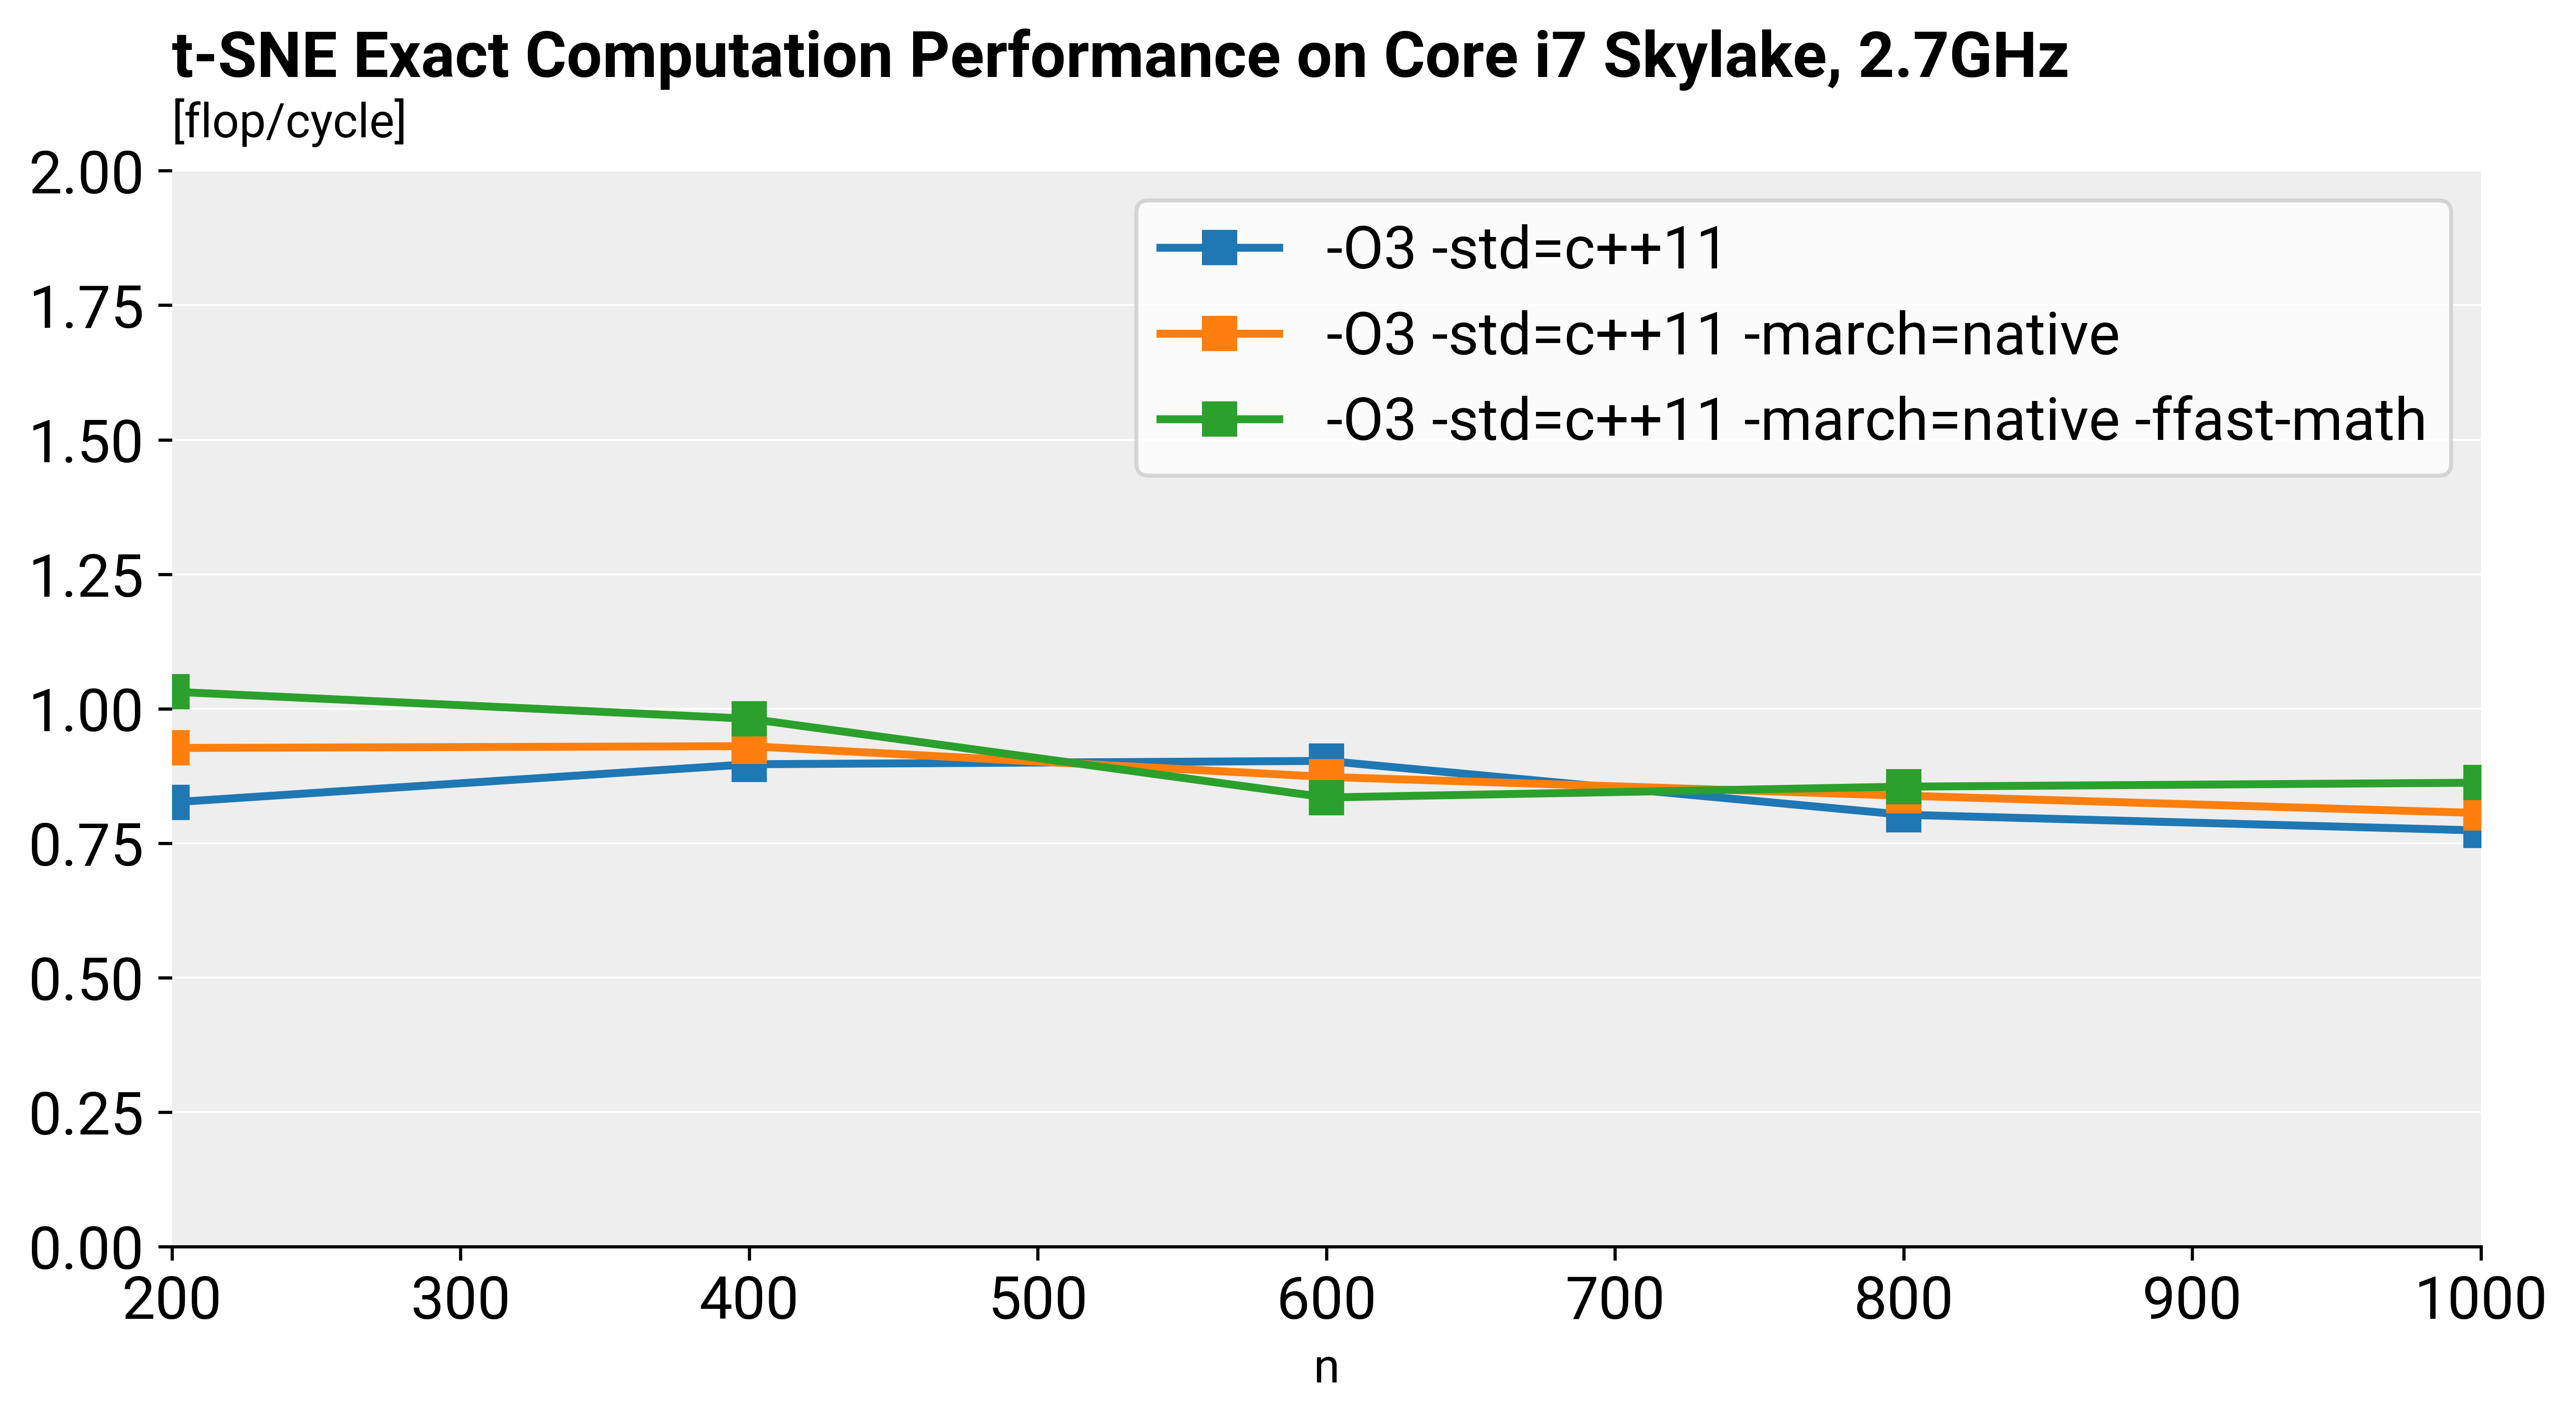

In [5]:
title = "t-SNE Exact Computation Performance on Core i7 Skylake, 2.7GHz"
plot(N, perf, labels=FLAGS, title=title)
plt.show()